In [19]:
import pandas as pd
# import plotnine as p9
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import random
import numpy as np
from math import radians, cos, sin, asin, sqrt

## THE FOLLOWING CODE ARE FROM https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
def haversine(x, y):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """

    lon1 = x[0]
    lat1 = x[1]
    lon2 = y[0]
    lat2 = y[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

def k_means_cities(k):

  df = pd.read_csv("worldcities.csv")
  df = df[['lng', 'lat']]

  pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])] 
  centers = random.sample(pts, k)
  old_cluster_ids, cluster_ids = None, [] # arbitrary but different
  while cluster_ids != old_cluster_ids:
      old_cluster_ids = list(cluster_ids)
      cluster_ids = []
      for pt in pts:
          min_cluster = -1
          min_dist = float('inf')
          for i, center in enumerate(centers):
              dist = haversine(pt, center)
              if dist < min_dist:
                  min_cluster = i
                  min_dist = dist
          cluster_ids.append(min_cluster)
      df['cluster'] = cluster_ids
      cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match] for match in range(k)]
      centers = [sum(pts)/len(pts) for pts in cluster_pts]
  fig = plt.figure(figsize=(16,8))
  ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
  ax.coastlines()

  for i in range(k):
    df_temp = df[df['cluster'] == i]
    ax.plot(df_temp['lng'], df_temp['lat'], "o", transform=ccrs.PlateCarree(), markersize=3)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


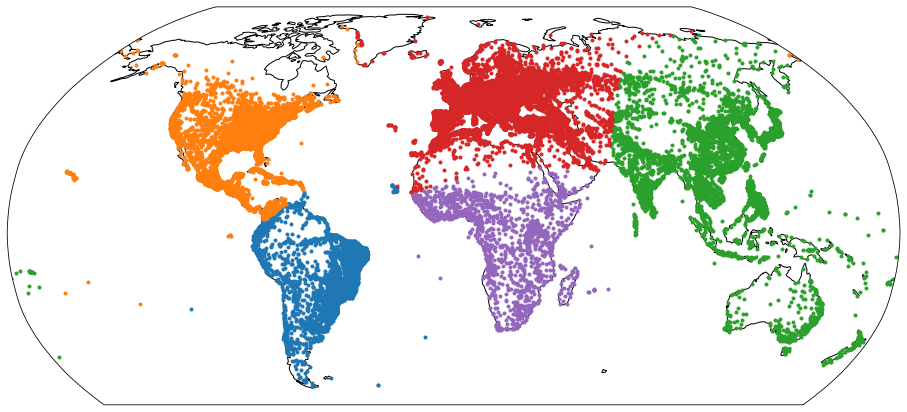

In [21]:
k_means_cities(5)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


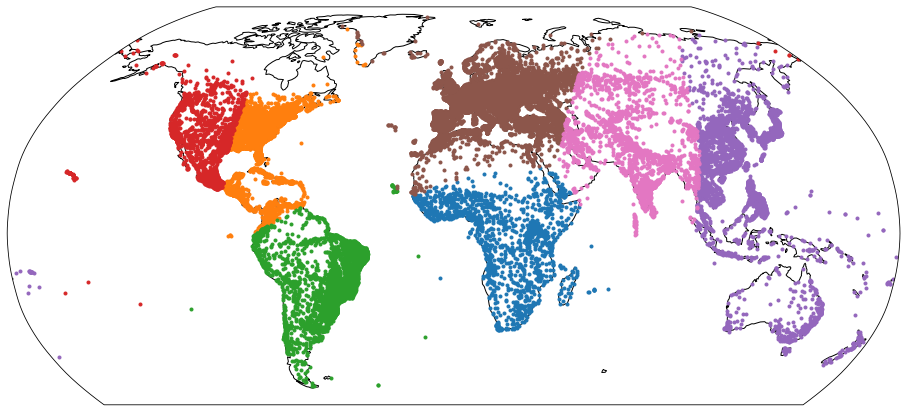

In [24]:
k_means_cities(7)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


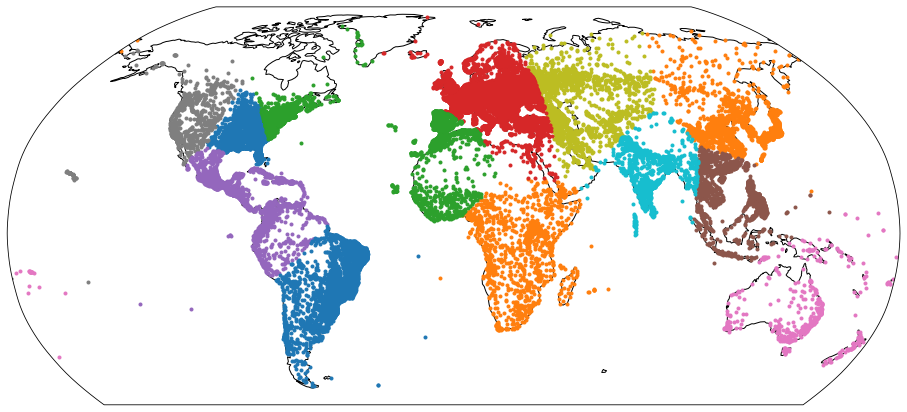

In [25]:
k_means_cities(15)